# Full test ETNN configs determined by optuna

## Importing section

In [1]:
import os
import sys
sys.path.insert(0, os.path.pardir)

In [2]:
import pandas as pd

from etnn.routines.run_config import run_config

import matplotlib.pyplot as plt

from etnn.tools.training_tools import ConfigStore

## Definitions section

In [3]:
def create_plot(
        config_idx: int,
        what: str = "r2"
) -> None:
    plt.figure()
    # load data
    STORAGE_FOLDER = os.path.join("../results", str(config_idx))
    df_measures = pd.read_csv(os.path.join(STORAGE_FOLDER, "accuracies.csv"))

    # Plot the initial data
    for config_id in df_measures.config_id.unique():
        # make subdataset for config id
        sub_df = df_measures[df_measures.config_id == config_id]

        # plot train test and val
        for mode in ['train', 'test', 'val']:
            # plot training
            plt.plot(sub_df.epoch, sub_df[f"{mode}_{what}"], label=f"{config_id}_{mode}-{what}")

    plt.title(f"{what} plot")
    plt.xlabel("epoch")
    plt.ylabel("score")
    if what == "r2":
        plt.ylim(-1, +1)
    plt.legend()
    plt.show()

## Tree advanced label

Rank 1 parameter configuration: Unnamed: 0                                      34
number                                          34
value                                     0.998455
datetime_start          2023-12-06 15:11:08.668067
datetime_complete       2023-12-06 15:12:50.482356
duration                    0 days 00:01:41.814289
params_batcher                               False
params_hidden_dim                               16
params_k                                         2
params_learning_rate                       0.00278
state                                     COMPLETE
Name: 34, dtype: object


100%|██████████| 300/300 [17:19<00:00,  3.47s/it]


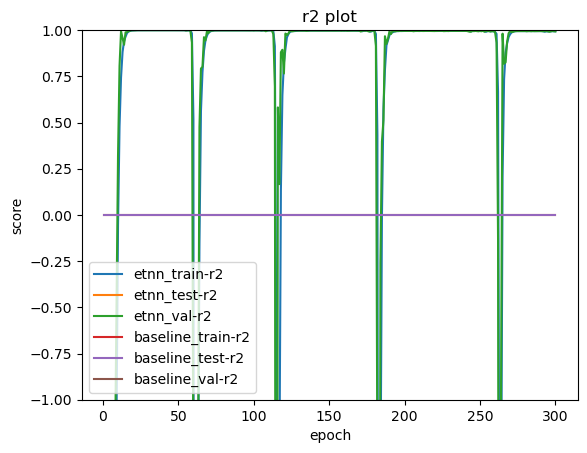

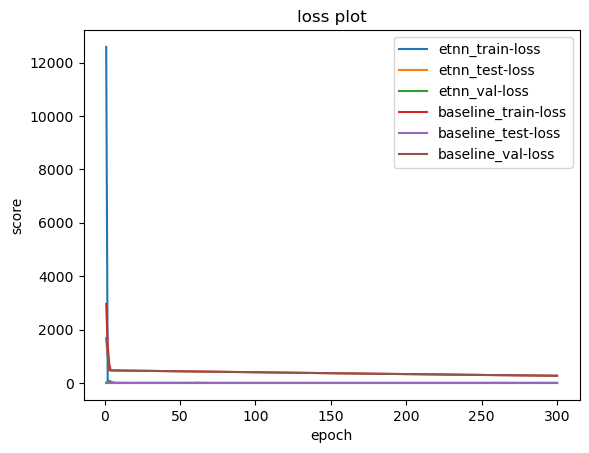

Rank 2 parameter configuration: Unnamed: 0                                      55
number                                          55
value                                     0.998418
datetime_start          2023-12-06 15:49:12.323436
datetime_complete       2023-12-06 15:51:00.335377
duration                    0 days 00:01:48.011941
params_batcher                               False
params_hidden_dim                               16
params_k                                         2
params_learning_rate                      0.002741
state                                     COMPLETE
Name: 55, dtype: object


100%|██████████| 300/300 [17:51<00:00,  3.57s/it]


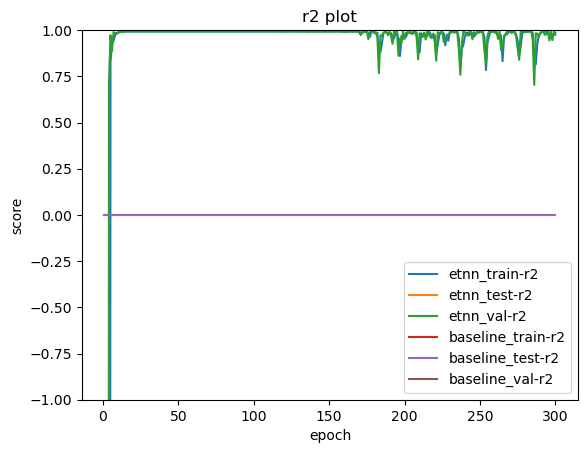

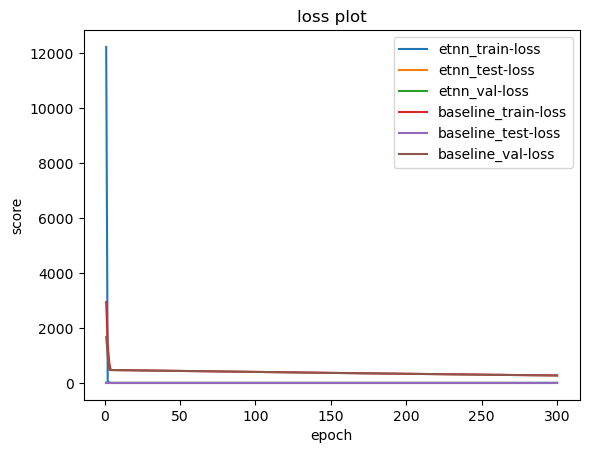

Rank 3 parameter configuration: Unnamed: 0                                      93
number                                          93
value                                     0.997795
datetime_start          2023-12-06 16:57:31.721904
datetime_complete       2023-12-06 16:59:28.908790
duration                    0 days 00:01:57.186886
params_batcher                               False
params_hidden_dim                               48
params_k                                         1
params_learning_rate                      0.000921
state                                     COMPLETE
Name: 93, dtype: object


100%|██████████| 300/300 [19:09<00:00,  3.83s/it]


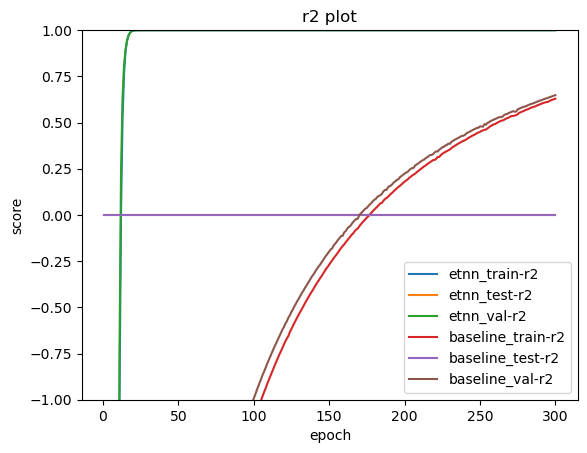

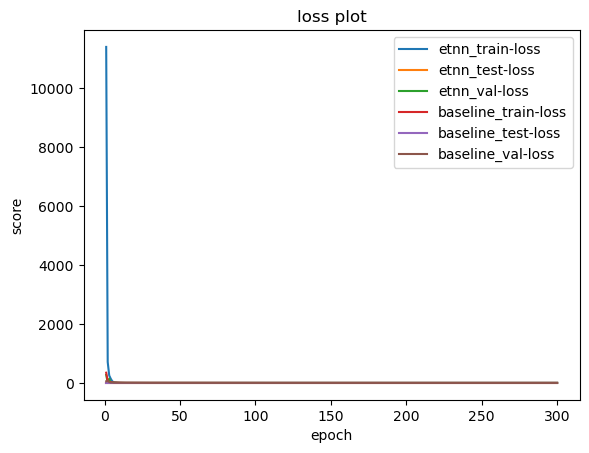

In [4]:
# define label to show
label = "tree_advanced"

# load config storage
config_table = pd.read_csv("study_label-tree-advanced.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=0,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../datasets",
        verbose=True,
        results_folder="../results",
        check_duplicate=True
    )

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

## Tree label

In [5]:
# define label to show
label = "tree"

# load config storage
config_table = pd.read_csv("study_label-tree.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=int(entry.params_hidden_dim),
        out_dim=1,
        k=int(entry.params_k),
        dataset=0,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=float(entry.params_learning_rate),
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=bool(entry.params_batcher),
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../datasets",
        verbose=True,
        results_folder="../results",
        check_duplicate=True
    )

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

Rank 1 parameter configuration: Unnamed: 0                                      32
number                                          32
value                                     0.866971
datetime_start          2023-12-06 21:15:37.084800
datetime_complete       2023-12-06 21:17:11.545920
duration                    0 days 00:01:34.461120
params_batcher                                True
params_hidden_dim                               64
params_k                                         1
params_learning_rate                      0.000056
state                                     COMPLETE
Name: 32, dtype: object


  0%|          | 0/300 [00:03<?, ?it/s]


TypeError: Object of type int64 is not JSON serializable

## Default label

In [ ]:
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv("study_label-default.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# iterate over top 3 best configs
for i in range(3):
    # get entry from dataframe
    entry = config_table.iloc[i]

    # print information to console
    print(f"Rank {i+1} parameter configuration: {entry}")

    # setup config
    config = ConfigStore(
        in_dim=15,
        hidden_dim=entry.params_hidden_dim,
        out_dim=1,
        k=entry.params_k,
        dataset=0,
        ds_size=10_000,
        num_gondolas=10,
        num_part_pg=5,
        loss_name='mse',
        optimizer_name='adam',
        num_max_epochs=300,
        learning_rate=entry.params_learning_rate,
        batch_size=1024,
        early_stop_tol=5,
        use_equal_batcher=entry.params_batcher,
        seed=420,
        label_type=label,
        final_label_factor=1/1000
    )

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../datasets",
        verbose=True,
        results_folder="../results",
        check_duplicate=True
    )

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")